<a href="https://colab.research.google.com/github/kelixirr/Complete-Machine-Learning-And-Data-Science-Course/blob/main/California_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we will be using our data to project the housing prices based on historical data. 

- We will be using RMSE as performance measure as it is used typically for regression problems.  

In [ ]:
# let's important the important tools 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 

In [ ]:
# download the data in notebook
housing = pd.read_csv("/content/drive/MyDrive/Data/housing.csv")

In [ ]:
# let's explore the data 

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
#check for the missing values
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        189
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We have missing values here. 

In [ ]:
# let's check for the categorical values from the data 
housing["ocean_proximity"].value_counts()


<1H OCEAN     8188
INLAND        5921
NEAR OCEAN    2399
NEAR BAY      2052
ISLAND           5
Name: ocean_proximity, dtype: int64

Output shows the number of district in different categories

In [ ]:
housing.describe()  # summary of numberical columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18565.000000,18565.000000,18565.000000,18565.000000,18376.000000,18565.000000,18565.000000,18565.000000,18565.000000
mean,-119.570116,35.633888,28.615890,2634.033827,537.711199,1426.223108,499.450902,3.867012,206617.794991
std,2.002922,2.137014,12.564224,2195.915548,424.125849,1142.570832,384.553175,1.895988,115447.104881
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,786.000000,279.000000,2.561200,119300.000000
50%,-118.500000,34.260000,29.000000,2123.000000,434.000000,1166.000000,408.000000,3.534100,179400.000000
75%,-118.010000,37.710000,37.000000,3141.000000,646.000000,1725.000000,603.000000,4.741100,264400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


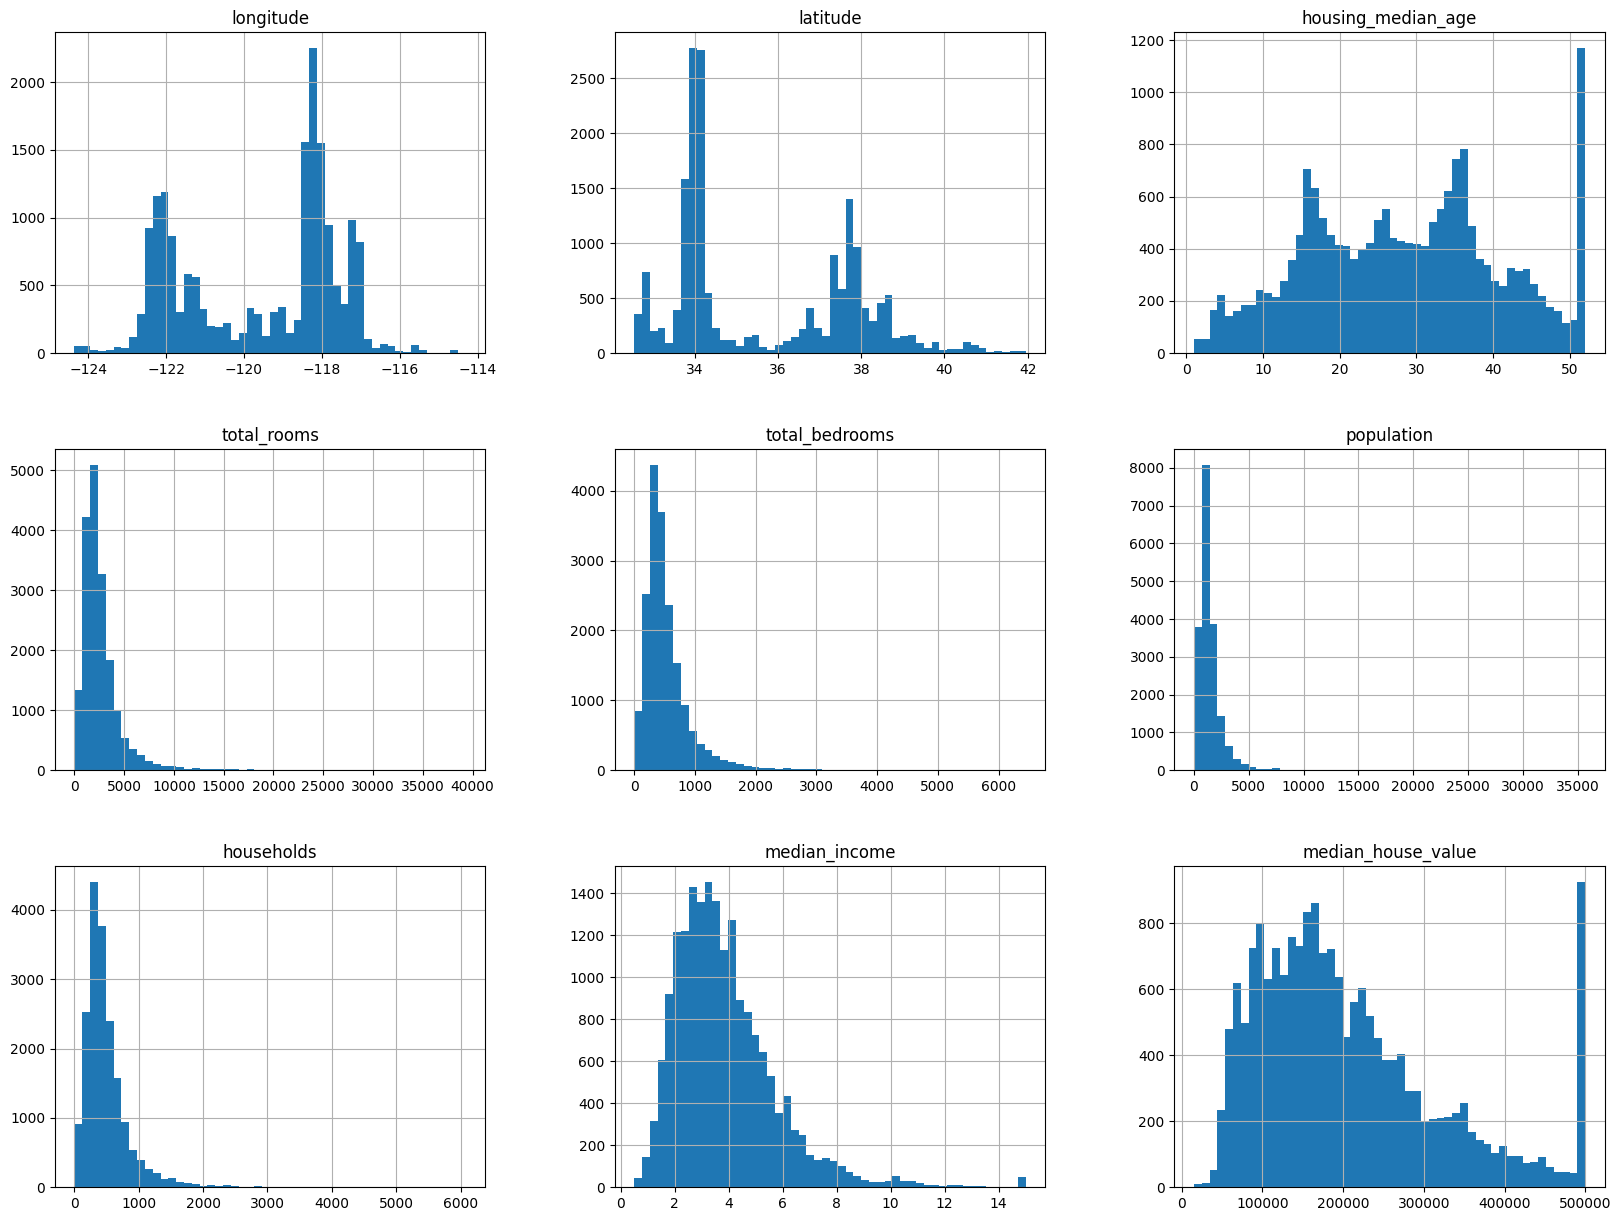

In [ ]:
# let's create graphs

housing.hist(bins=50, figsize=(20,15))   # on whole dataset
plt.show()



1.  Notice the median income is capped and scaled value 

2. Housing values are also capped at $500K so you need to keep that in mind based on problem. 

3. Graphs are mostly not in normal distribution which can be difficult for many ml algorithms




In order to avoid snooping bias, let's set aside our test set which can be 20% of our dataset. 

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1084,-121.71,39.42,21,1432,284.0,862,275,2.2813,57600,INLAND
9476,-117.71,33.51,11,2198,252.0,883,281,13.1477,487000,<1H OCEAN
2312,-124.16,40.80,52,2167,480.0,908,451,1.6111,74700,NEAR OCEAN
5528,-117.95,34.09,21,2215,484.0,1792,419,2.8375,166500,<1H OCEAN
2677,-119.07,35.35,24,4119,865.0,1294,879,2.4123,86200,INLAND


In [ ]:
len(train_set)

14852

In [ ]:
len(test_set)

3713

<Axes: >

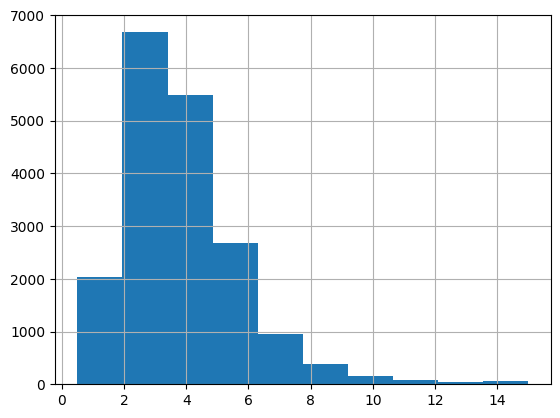

In [ ]:
housing["median_income"].hist()

In [ ]:
# checking for the income distribution 
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    6523
2    5922
4    3265
5    2116
1     739
Name: income_cat, dtype: int64

<Axes: >

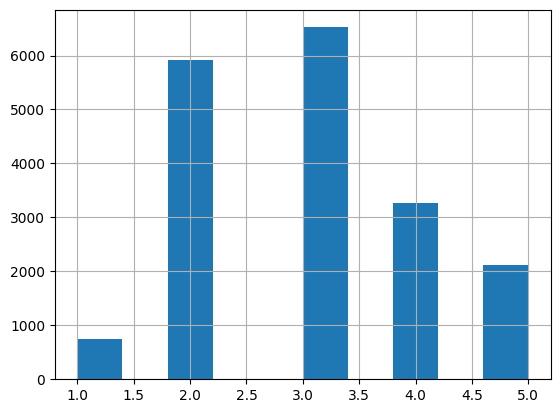

In [ ]:
housing["income_cat"].hist()

As you can see that majority our data is located between 1.5 to 6. Some median income may go beyond that so we may need to perform stratified sampling so that our test set maybe representaive of our data for selecting the best model. 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
  

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.351468
2    0.318880
4    0.175869
5    0.113924
1    0.039860
Name: income_cat, dtype: float64

In [ ]:
# checking if our test sets created using stratified sampling and purely random sampling our representive of our data

#creating a simple function
def income_cat_proportions(data):
  return data["income_cat"].value_counts()/len(data)


#creating train and test stes 
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


#Creating panda DataFrame to show the result
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()


#Calculating results
compare_props["Rand. Error%"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. Error%"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

# showing the result 
compare_props 


,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039806,0.039860,0.038783,-2.571042,0.135318
2,0.318987,0.318880,0.324805,1.823708,-0.033772
3,0.351360,0.351468,0.352006,0.183964,0.030661
4,0.175869,0.175869,0.168866,-3.981623,0.000000
5,0.113978,0.113924,0.115540,1.370510,-0.047259


As you can see above that stratified sampling is representive of Overall data. 

In [ ]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3553,-118.58,34.21,13,6227,1317.0,3739,1226,4.0313,299300,<1H OCEAN,3
13727,-117.30,33.07,14,2670,426.0,1034,407,6.4247,295100,NEAR OCEAN,5
17239,-122.58,38.46,15,2936,517.0,1182,501,3.3981,246900,<1H OCEAN,3
16818,-122.40,40.57,23,1321,259.0,749,222,1.6550,90100,INLAND,2
2244,-120.37,36.15,34,2084,339.0,868,347,4.3810,86300,INLAND,3


In [ ]:
# let's remove the column we added so that we can bring back the data to its original state

strat_test_set.drop("income_cat", axis=1, inplace=True)


In [ ]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3553,-118.58,34.21,13,6227,1317.0,3739,1226,4.0313,299300,<1H OCEAN
13727,-117.30,33.07,14,2670,426.0,1034,407,6.4247,295100,NEAR OCEAN
17239,-122.58,38.46,15,2936,517.0,1182,501,3.3981,246900,<1H OCEAN
16818,-122.40,40.57,23,1321,259.0,749,222,1.6550,90100,INLAND
2244,-120.37,36.15,34,2084,339.0,868,347,4.3810,86300,INLAND
...,...,...,...,...,...,...,...,...,...,...
8222,-118.03,34.58,4,9849,1780.0,4546,1598,4.0729,154300,INLAND
4362,-118.30,34.02,31,1933,478.0,1522,423,1.5781,119300,<1H OCEAN
9270,-117.83,33.87,5,6971,1449.0,3521,1423,5.2131,243900,<1H OCEAN
18041,-119.06,35.94,18,3501,721.0,2009,660,2.6576,65700,INLAND


## Visualizing Our Data

In [ ]:
# let's create a training set copy so that we can play with it without harming the original one

df = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

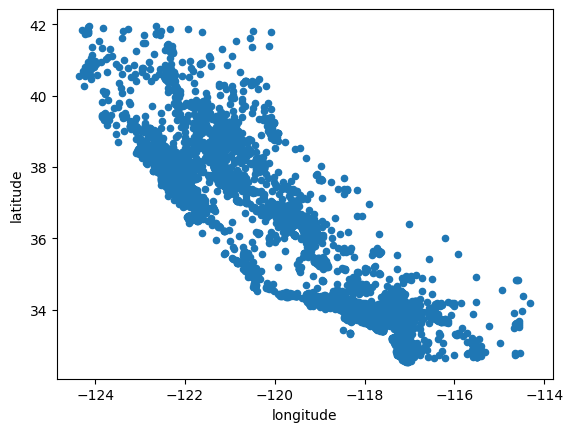

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

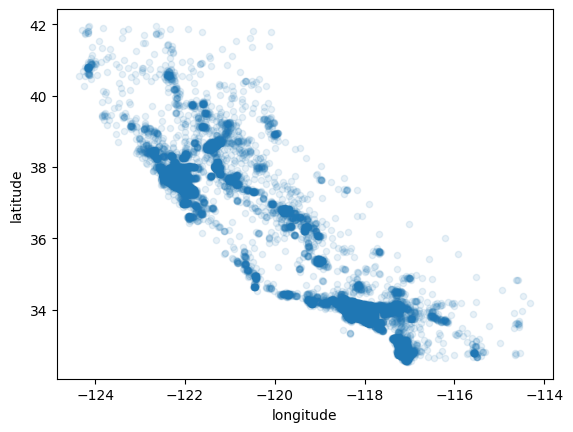

In [ ]:
# checking the high density area by using alpha 

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
# checking correlation 

corr_matrix = df.corr()

<ipython-input-45-f32d4da338e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688436
total_rooms           0.133707
housing_median_age    0.105170
households            0.065749
total_bedrooms        0.049286
population           -0.024077
longitude            -0.043982
latitude             -0.146577
Name: median_house_value, dtype: float64

<ipython-input-49-4dc59a3fa60d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");


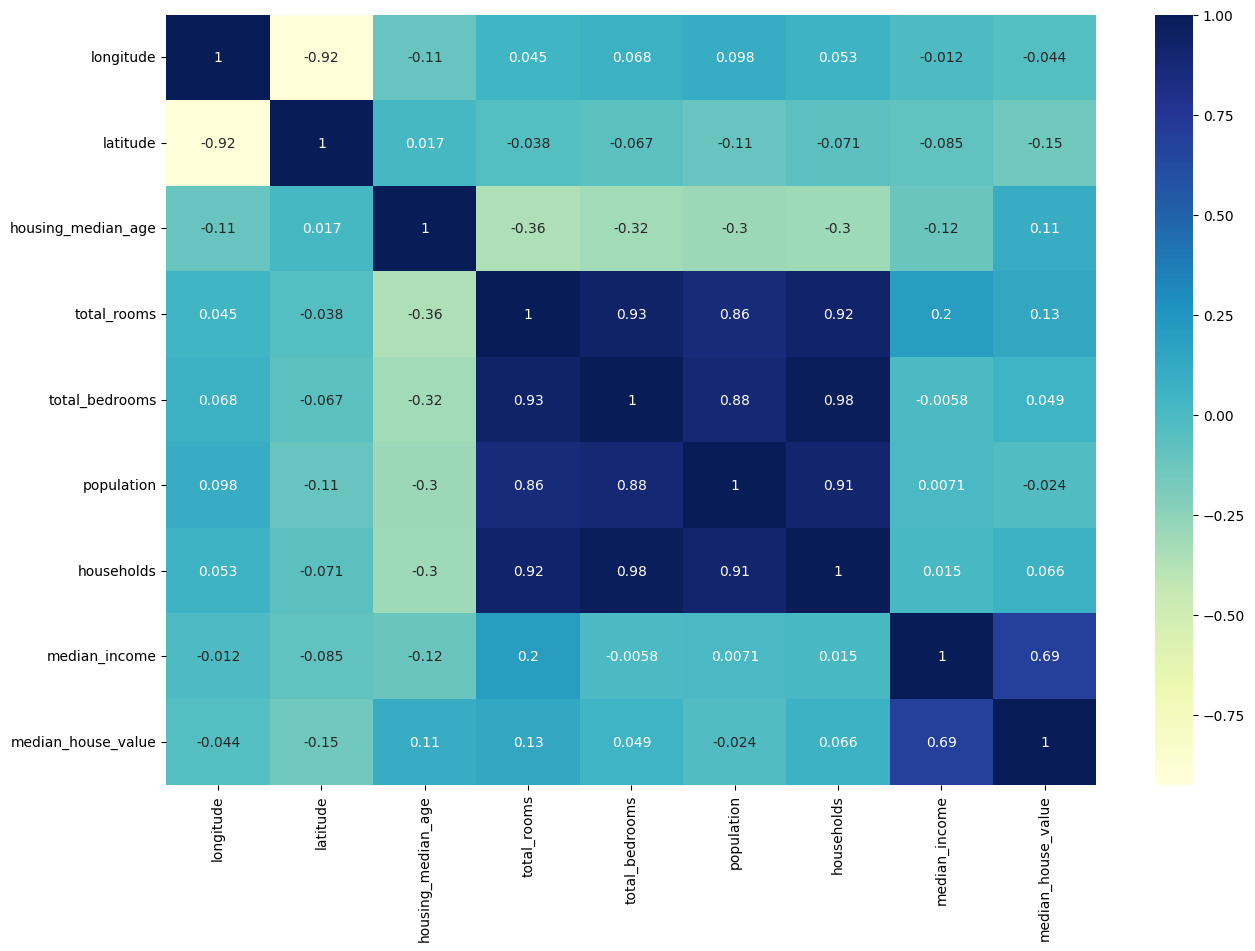

In [ ]:
import seaborn as sns 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

The most important attribute here is individuals's income. 

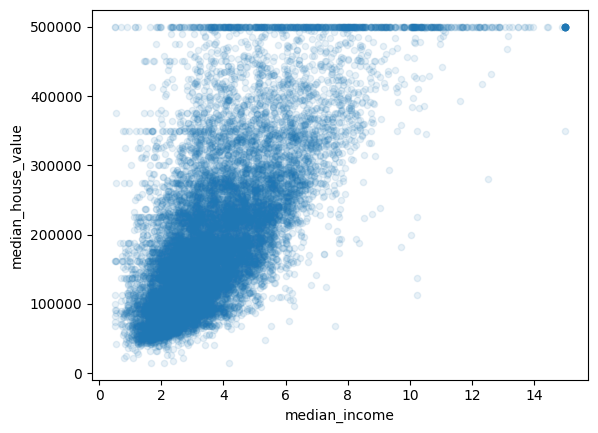

In [ ]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1);

As we can see we have strong correlation here. Also notice some small lines below the top capped line. 

## Combining Attributes

There are some attributes in our data that may not be useful so we can combine some attributes and see what we can get

In [ ]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_rooms"]  = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

In [ ]:
# check the correlation again 
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=True)

<ipython-input-54-48f12702e204>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


bedrooms_per_rooms         -0.257926
latitude                   -0.146577
longitude                  -0.043982
population                 -0.024077
population_per_household   -0.021318
total_bedrooms              0.049286
households                  0.065749
housing_median_age          0.105170
total_rooms                 0.133707
rooms_per_household         0.144387
median_income               0.688436
median_house_value          1.000000
Name: median_house_value, dtype: float64

## Preparing The Data For Model 

In [ ]:
# let's create a new copy of training data by dropping the labels 

df = strat_train_set.drop("median_house_value", axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3874,-118.29,34.09,52,1272,322.0,984,353,1.9063,<1H OCEAN
2950,-122.90,39.17,45,1314,277.0,649,232,2.5750,INLAND
5865,-118.01,34.07,24,5684,1485.0,6626,1481,2.2559,INLAND
12480,-117.31,34.43,16,5130,1172.0,3126,1046,1.6784,INLAND
6690,-118.19,33.94,45,1871,371.0,1315,382,3.3661,<1H OCEAN


In [ ]:
# now create labels 
df_labels = strat_train_set["median_house_value"].copy()

In [ ]:
df_labels.head()

3874     261600
2950      73600
5865     166800
12480     71900
6690     160800
Name: median_house_value, dtype: int64

In [ ]:
#let's perfom data cleaning: Working with missing values using Sklearn Data Imputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

#create a copy of data because median can work on numerical values only 

df_num = df.drop("ocean_proximity", axis=1)

# fit the imputer 

imputer.fit(df_num)


SimpleImputer(strategy='median')

It's a good idea to apply Imputer to all numerical values as missing values may occur in future data as well. 

In [ ]:
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2128.5    ,  435.     ,
       1171.     ,  409.     ,    3.52945])

In [ ]:
df_num.median().values

array([-118.49   ,   34.25   ,   29.     , 2128.5    ,  435.     ,
       1171.     ,  409.     ,    3.52945])

In [ ]:
X = imputer.transform(df_num)  # transform the training set by replacing the missing values using medians

In [ ]:
# put the result in dataframe 

df_tr = pd.DataFrame(X, columns = df_num.columns, index = df_num.index)
df_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3874,-118.29,34.09,52.0,1272.0,322.0,984.0,353.0,1.9063
2950,-122.90,39.17,45.0,1314.0,277.0,649.0,232.0,2.5750
5865,-118.01,34.07,24.0,5684.0,1485.0,6626.0,1481.0,2.2559
12480,-117.31,34.43,16.0,5130.0,1172.0,3126.0,1046.0,1.6784
6690,-118.19,33.94,45.0,1871.0,371.0,1315.0,382.0,3.3661


## Text And Categorical Attributes

In [ ]:
df_cat = df[["ocean_proximity"]]
df_cat.head()

,ocean_proximity
3874,<1H OCEAN
2950,INLAND
5865,INLAND
12480,INLAND
6690,<1H OCEAN


In [ ]:
df_cat.ndim

2

These are categorical values. We will convert these categories in numbers for ML models 

We will use One-hot encoding here because we want Ml model to learn each category and each of them are important

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<14852x5 sparse matrix of type '<class 'numpy.float64'>'
	with 14852 stored elements in Compressed Sparse Row format>

In [ ]:
df_cat_1hot.toarray()  # convert the output in dense NumPy array

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# let's add a transformer so that we can implete it on new data 

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


## Transformation Pipelines
For preprocessing the numerical attributes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler   # feature scaling the data for same scales

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

df_num_tr = num_pipeline.fit_transform(df_num)



In [ ]:
df_num_tr

array([[ 0.63601438, -0.71877716,  1.86701076, ..., -0.70018119,
        -0.02722774,  0.58252214],
       [-1.67266041,  1.66885209,  1.30763766, ...,  0.09420919,
        -0.02641934, -0.05244933],
       [ 0.77623758, -0.72817728, -0.37048164, ..., -0.60975061,
         0.11078509,  0.70422871],
       ...,
       [ 1.24197892, -1.21228321, -1.48922784, ...,  0.6326262 ,
         0.01213163, -1.19458327],
       [ 0.81129338, -0.82687849,  0.50853323, ...,  0.07487113,
         0.07013489, -0.45740234],
       [-1.26701473,  1.09074501,  0.02907057, ...,  0.51167883,
        -0.04443248, -0.99105485]])

In [ ]:
# dealing with numerical and categorical attributes at the same time

from sklearn.compose import ColumnTransformer

num_attributes = list(df_num)
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes),
])

housing_prepared = full_pipeline.fit_transform(df)

In [ ]:
housing_prepared

array([[ 0.63601438, -0.71877716,  1.86701076, ...,  0.        ,
         0.        ,  0.        ],
       [-1.67266041,  1.66885209,  1.30763766, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77623758, -0.72817728, -0.37048164, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.24197892, -1.21228321, -1.48922784, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81129338, -0.82687849,  0.50853323, ...,  0.        ,
         0.        ,  0.        ],
       [-1.26701473,  1.09074501,  0.02907057, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
housing_prepared.shape

(14852, 16)

## Select And Train A Model 

### Training and evaluating our models on training set 

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, df_labels)    # there are also like X_train, Y_train


LinearRegression()

In [ ]:
# let's try it our on a few instagnces of training set 

#selecting a few data points from the training set
some_data = housing.iloc[:5]
some_labels = df_labels.iloc[:5]

#preprocessing the data
some_data_prepared = full_pipeline.transform(some_data)

print("Prediction", lin_reg.predict(some_data_prepared))

Prediction [406694.24293585 434090.88726234 253011.12238093 262879.27993192
 257787.29286714]


In [ ]:
# let's compare the prediction against actual value

print('Labels:', list(df_labels))

Labels: [261600, 73600, 166800, 71900, 160800, 411300, 175000, 69600, 213800, 274100, 450000, 151500, 188300, 359500, 125000, 271900, 103500, 131800, 126700, 263900, 76900, 146800, 140800, 204300, 244400, 203400, 95600, 121900, 198100, 243800, 194100, 94600, 120000, 151000, 220200, 291400, 353800, 99100, 81600, 225400, 165500, 160100, 291500, 165000, 135200, 500001, 196000, 128400, 193200, 344000, 276600, 246400, 362500, 229800, 372700, 107000, 421000, 147700, 177500, 179200, 201700, 150000, 168800, 166000, 69400, 137500, 202200, 57700, 140400, 319800, 249100, 61300, 336700, 330800, 44600, 288200, 237300, 262500, 356300, 418500, 194800, 328000, 381500, 137500, 131500, 286500, 340100, 279300, 214400, 143400, 183000, 65200, 275000, 102500, 441900, 202800, 357400, 185300, 224200, 430800, 376800, 195000, 270000, 434500, 190400, 155800, 108000, 175400, 115200, 273700, 162500, 363700, 158800, 171000, 275000, 279500, 232400, 186200, 315200, 277300, 164400, 159900, 117900, 381000, 128000, 1833

In [ ]:
some_data_prepared

array([[-1.33712633,  1.06254466,  0.98799589, -0.80069928, -0.97177619,
        -0.99035287, -0.97816196,  2.35664747,  0.60326752, -0.0462119 ,
        -1.01553769,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.33211836,  1.05314455, -0.61021297,  2.03660693,  1.3502502 ,
         0.86948605,  1.66299234,  2.34406635,  0.31564908, -0.08268706,
        -0.87747374,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.34714227,  1.04844449,  1.86701076, -0.45989405, -0.61289596,
        -0.7729691 , -0.63105374, -0.01103474,  0.33250398, -0.07682557,
        -0.63302206,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.34714227,  1.04844449,  1.86701076, -0.78290623, -0.77213421,
        -0.90894578, -0.80330293,  0.08971994, -0.25361144, -0.08022753,
         0.26200674,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.34714227,  1.04374443,  1

In [ ]:
# measuring the RMSE on whole training set

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(df_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

68364.70973776895

This error is not a great score as this much gap in pricing is not good. This maybe happening because our model is underfitting: 

- Features don't have enough information for better prediction or 
- We need to try more complex models

#### Decision Trees

In [ ]:
# let's try decision trees

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(df_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This model seems to be overfitting as the error is 0. We can try cross validation instead of choosing to test it on test data which is not something we should do. Let's try cross-validation and see its performance. 

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, df_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Devidation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66999.94468294 74629.6548089  70020.46421338 67300.18751661
 72759.76796266 72417.63947121 70162.83858587 70264.13591108
 70882.00316516 69458.19107673]
Mean: 70489.48273945382
Standard Devidation: 2235.0968381702537


We have used -scores because Scikit-Learn’s cross-validation features expect a utility function (greater vlaue is better)

The mean score is not good as compared to linear regression but let's try cross validation for linear regression model as well. 

#### Decision Trees And Linear Regression (Cross Validation)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(lin_rmse_scores)

Scores: [65883.62790386 71204.95647018 67954.33935549 67981.46079874
 67646.6832315  69292.54849199 66950.99344383 69744.71521518
 68896.04640916 71749.25323485]
Mean: 68730.46245547793
Standard Devidation: 1738.3098313957044


This score is better than that of decision treee even after cross validation which means decision tree is overfitting. 

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, df_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(df_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18878.719052802906

In [ ]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [46734.71428356 49888.9176085  51024.05838772 49110.66289787
 52300.7279091  53777.83950473 49728.48717815 51000.34110771
 49616.95536301 51400.22649916]
Mean: 50458.2930739523
Standard Devidation: 1821.013453448187


The score here is better than others but notice the mean score is still better here only on validation sets and not on training sets. We can further reguralize the model or maybe try to other ml models 

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, df_labels)

housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(df_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111945.23693377149

In [ ]:
svm_scores = cross_val_score(svm_reg, housing_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)

svm_rmse_scores = np.sqrt(-svm_scores)

display_scores(svm_rmse_scores)

Scores: [107911.0103446  111784.7807369  110816.56445991 110577.91418328
 109945.17396838 117573.1571271  113074.62279672 112642.45507546
 117364.17200666 113892.70089434]
Mean: 112558.25515933335
Standard Devidation: 2937.33086843918


Even the cross val score is not better here. We will try to use different kernels for the SVM and see if this can work any btter but we will get back to that. 

## Fine Tuning Our Model

Let's assume we selected our RandomForestRegressor model. Now let's fine tune it. We will try to use different hyperparamter values and see if they model performance improves

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
    # trying 12 combination here 3 * 4
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
     
     # then trying 6 - 2*3 while bootsrap is set to False 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# find the best params 

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
# you can also check the score of each hyperparameter tested 

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64152.2644039281 {'max_features': 2, 'n_estimators': 3}
56024.31912467915 {'max_features': 2, 'n_estimators': 10}
53499.29337378629 {'max_features': 2, 'n_estimators': 30}
59906.28041314151 {'max_features': 4, 'n_estimators': 3}
52497.29375797341 {'max_features': 4, 'n_estimators': 10}
50401.403967917395 {'max_features': 4, 'n_estimators': 30}
58900.9087399598 {'max_features': 6, 'n_estimators': 3}
52002.67570367813 {'max_features': 6, 'n_estimators': 10}
50540.896507113226 {'max_features': 6, 'n_estimators': 30}
59064.39337814056 {'max_features': 8, 'n_estimators': 3}
52584.879778630224 {'max_features': 8, 'n_estimators': 10}
50208.49582718065 {'max_features': 8, 'n_estimators': 30}
63636.93498836745 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54915.66702036809 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59416.96876075704 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53528.91727559374 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [ ]:
# now let's try Randomized Search which allows you to try random combination when hyperparameter space are large

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 

param_distribs = {
    
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(housing_prepared, df_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0f42a97520>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f0f42a97610>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49354.61789562116 {'max_features': 7, 'n_estimators': 180}
51736.972417022764 {'max_features': 5, 'n_estimators': 15}
50770.323363329975 {'max_features': 3, 'n_estimators': 72}
50938.8184256831 {'max_features': 5, 'n_estimators': 21}
49532.623442271484 {'max_features': 7, 'n_estimators': 122}
50750.4088816514 {'max_features': 3, 'n_estimators': 75}
50627.545137995454 {'max_features': 3, 'n_estimators': 88}
49747.444463919805 {'max_features': 5, 'n_estimators': 100}
50438.38905602935 {'max_features': 3, 'n_estimators': 150}
65585.42368579174 {'max_features': 5, 'n_estimators': 2}


## Evaluation On Tets Set

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

48664.61273461255

In [ ]:
# let's calculate 95% confidence interval for the test RMSE for surity 

from scipy import stats 

confidence = 0.95 

squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1, 
                         loc = squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46435.58414768, 50795.92099847])

This is the interval of model generalization error

In [ ]:
import joblib 
joblib.dump(final_model, "my_final_model.pkl")
my_final_model_loaded = joblib.load("my_final_model.pkl")

## Extras 

## SVM with different Kernels and Params

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, df_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  12.5s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.0s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.4s
[CV] END .............................C=100.0, kernel=linear; total time=   8.3s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70143.56528809597

In [ ]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}